Here deterministic strategies: Random, RandomInTree (by Vlad), RandomOuter, RandomInner
For ω_n (I ... I)_m define n == m for, where n is [2, 20]

# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [2]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [3]:
import matplotlib.pyplot as plt


def draw_mult_lines(
    comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
## Random

In [4]:
nm_pairs = [(x, x) for x in range(2, 20+2)]

In [5]:
random_steps = []
strategy = RandomStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [06:36<00:00, 19.83s/it]


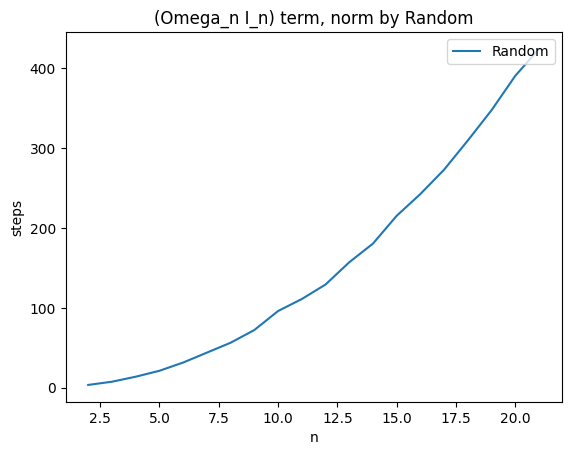

In [6]:
context = {
    "Random": (random_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by Random", x_label="n", y_label="steps")

## RandomInTree (by Vlad)

In [7]:
random_in_tree_steps = []
strategy = RandomInTreeStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_in_tree_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [04:47<00:00, 14.37s/it]


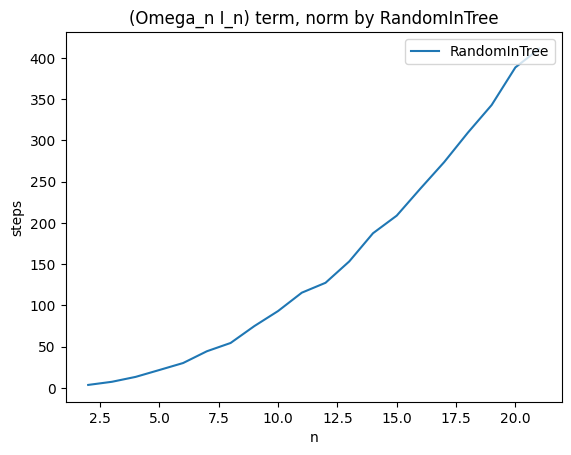

In [8]:
context = {
    "RandomInTree": (random_in_tree_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomInTree", x_label="n", y_label="steps")

## RandomOuter

In [9]:
random_outer_steps = []
strategy = RandomOuterStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_outer_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [08:44<00:00, 26.25s/it]


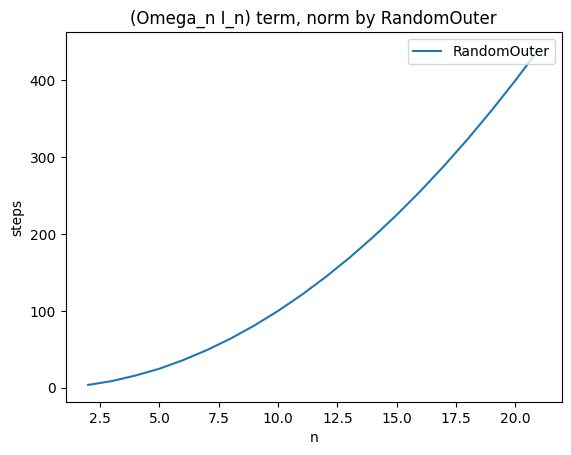

In [10]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomOuter", x_label="n", y_label="steps")

## RandomInner

In [11]:
random_inner_steps = []
strategy = RandomStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_inner_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [06:25<00:00, 19.27s/it]


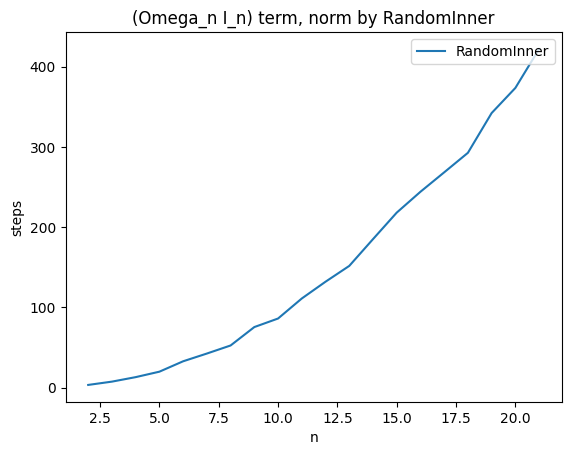

In [12]:
context = {
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomInner", x_label="n", y_label="steps")

# Plot graphics comparisons

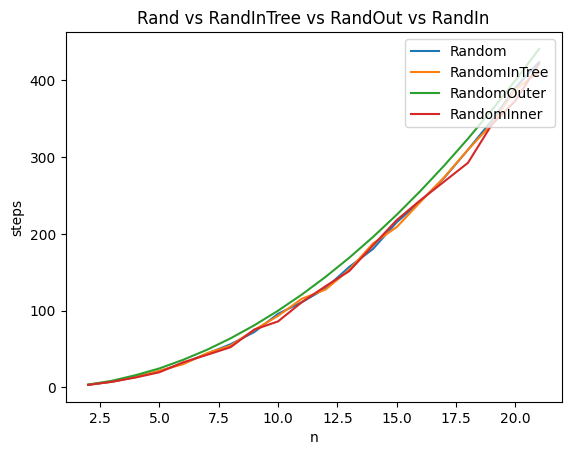

In [13]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree vs RandOut vs RandIn", x_label="n", y_label="steps")

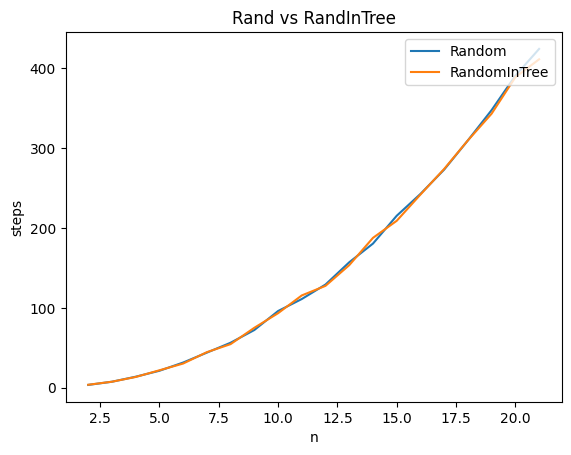

In [14]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree", x_label="n", y_label="steps")

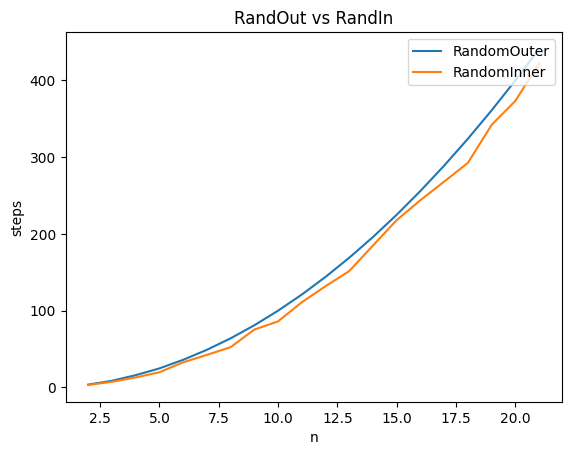

In [15]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="RandOut vs RandIn", x_label="n", y_label="steps")